In [1]:
# HIDDEN

from datascience import *
path_data = '../../../data/'
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### The Monty Hall Problem ###
This [problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) has flummoxed many people over the years, [mathematicians included](https://web.archive.org/web/20140413131827/http://www.decisionsciences.org/DecisionLine/Vol30/30_1/vazs30_1.pdf). Let's see if we can work it out by simulation.

The setting is derived from a television game show called "Let's Make a Deal". Monty Hall hosted this show in the 1960's, and it has since led to a number of spin-offs. An exciting part of the show was that while the contestants had the chance to win great prizes, they might instead end up with "zonks" that were less desirable. This is the basis for what is now known as *the Monty Hall problem*.

The setting is a game show in which the contestant is faced with three closed doors. Behind one of the doors is a fancy car, and behind each of the other two there is a goat. The contestant doesn't know where the car is, and has to attempt to find it under the following rules.

- The contestant makes an initial choice, but that door isn't opened.
- At least one of the other two doors must have a goat behind it. Monty opens one of these doors to reveal a goat, displayed in all its glory in [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem):

![Monty Hall goat](../../../images/monty_hall_goat.png)

- There are two doors left, one of which was the contestant's original choice. One of the doors has the car behind it, and the other one has a goat. The contestant now gets to choose which of the two doors to open.

The contestant has a decision to make. Which door should she choose to open, if she wants the car? Should she stick with her initial choice, or switch to the other door? That is the Monty Hall problem.

### The Solution ###

In any problem involving chances, the assumptions about randomness are important. It's reasonable to assume that there is a 1/3 chance that the contestant's initial choice is the door that has the car behind it. 

The solution to the problem is quite straightforward under this assumption, though the straightforward solution doesn't convince everyone. Here it is anyway.

- The chance that the car is behind the originally chosen door is 1/3.
- The car is behind either the originally chosen door or the door that remains. It can't be anywhere else.
- Therefore, the chance that the car is behind the door that remains is 2/3.
- Therefore, the contestant should switch.

That's it. End of story. 

Not convinced? Then let's simulate the game and see how the results turn out.

### Simulation ###
The simulation will be more complex that those we have done so far. Let's break it down.

### Step 1: What to Simulate ###
For each play we will simulate what's behind all three doors:
- the one the contestant first picks
- the one that Monty throws out
- the remaining door
So we will be keeping track of three quantitites, not just one.

### Step 2: Simulating One Play ###
The bulk of our work consists of simulating one play of the game. This involves several pieces.

#### The Doors ####
We start by setting up two useful arrays – `doors` and `goats` – that will allow us to distinguish the three doors and the two goats.

In [2]:
doors = make_array('Car', 'Goat 1', 'Goat 2')
goats = make_array('Goat 1', 'Goat 2')

#### Identifying Goats ####

We are going to have to recognize whether a door has a goat behind it or not. We can just label each door with what's behind it; the contestant can't see what we are doing! 

The function `is_goat` takes a door label and returns a Boolean signifying whether or not it is a goat.

In [3]:
def is_goat(door_name):

    if door_name == "Goat 1":
        return True
    elif door_name == "Goat 2":
        return True
    else:
        return False


Let's check that this function can indeed tell goats from cars.

In [4]:
is_goat('Goat 1')

True

In [5]:
is_goat('Goat 2')

True

In [6]:
is_goat('Car')

False

#### One Play ####

If the contestant's original choice is a door with a goat, Monty must throw out the other goat, and what will remain is the car. If the original choice is the door with a car, Monty must throw out one of the two goats, and what will remain is the other goat. 

It is clear, therefore, that the function `other_one` defined in an earlier section will be useful. It takes a string and a two-element array; if the string is equal to one of the elements, it returns the other one.

In [7]:
def other_one(x, a_b):
    if x == a_b.item(0):
        return a_b.item(1)
    elif x == a_b.item(1):
        return a_b.item(0)
    else:
        return 'Input Not Valid'

If the contestant's original choice is a goat, then the outcome of the game could be one of the following two:

In [8]:
original = 'Goat 1'
make_array(original, other_one(original, goats), 'Car')

array(['Goat 1', 'Goat 2', 'Car'], dtype='<U6')

In [9]:
original = 'Goat 2'
make_array(original, other_one(original, goats), 'Car')

array(['Goat 2', 'Goat 1', 'Car'], dtype='<U6')

If the original choice happens to be the car, then let's assume Monty throws out one of the two goats at random, and the other goat is behind the remaining door.

In [10]:
original = 'Car'
throw_out = np.random.choice(goats)
make_array(original, throw_out, other_one(throw_out, goats))

array(['Car', 'Goat 1', 'Goat 2'], dtype='<U6')

#### A Function to Simulate One Play ####
Now we define a function `monty_hall` that simulates the game and returns an array of three strings in this order: 
- what is behind the contestant's original choice of door
- what Monty throws out
- what is behind the remaining door

We can now put all this code together into a single function `monty_hall` to simulate the result of one game. The function takes no arguments. 

The contestant's original choice will be a door chosen at random from among the three doors. 

To check whether the original choice is a goat or not, we first write a little function named `is_goat`.

In [11]:
def monty_hall():

    """ Play the Monty Hall game once
    and return an array of three strings:
    
    original choice, what Monty throws out, what remains
    """
    
    original = np.random.choice(doors)
    
    if is_goat(original):
        return make_array(original, other_one(original, goats), 'Car')
    
    else:
        throw_out = np.random.choice(goats)
        return make_array(original, throw_out, other_one(throw_out, goats))

Let's play the game a few times! Here is one outcome. You should run the cell several times to see how the outcome changes.

In [12]:
monty_hall()

array(['Car', 'Goat 1', 'Goat 2'], dtype='<U6')

### Step 3: Number of Repetitions ###
To gauge the frequency with which the different outcomes occur, we have to play the games many times and collect the results. Let's run 10,000 repetitions.

### Step 4: Coding the Simulation ###
It's time to run the simulation. We will start by defining three empty arrays, one each for the original choice, what Monty throws out, and what remains. 

In [13]:
original = make_array()     # original choice
throw_out = make_array()    # what Monty throws out
remains = make_array()      # what remains

num_repetitions = 10000

for i in np.arange(num_repetitions): 
    result = monty_hall()    # the result of one game
    
    # Collect the results in the appropriate arrays
    original = np.append(original, result.item(0))
    throw_out = np.append(throw_out, result.item(1))
    remains = np.append(remains, result.item(2))

The simulation is done. As always, the majority of the work is in generating the simulated outcome of one repetition.

### Visualization ###

We can now put all the results into one table for ease of visualization.

In [14]:
results = Table().with_columns(
    'Original Door Choice', original,
    'Monty Throws Out', throw_out,
    'Remaining Door', remains
)
results

Original Door Choice,Monty Throws Out,Remaining Door
Goat 2,Goat 1,Car
Car,Goat 1,Goat 2
Goat 1,Goat 2,Car
Goat 2,Goat 1,Car
Goat 2,Goat 1,Car
Goat 2,Goat 1,Car
Car,Goat 2,Goat 1
Goat 1,Goat 2,Car
Car,Goat 2,Goat 1
Car,Goat 1,Goat 2


To see whether the contestant should stick with her original choice or switch, let's see how frequently the car is behind each of her two options.

In [15]:
results.group('Original Door Choice')

Original Door Choice,count
Car,3383
Goat 1,3335
Goat 2,3282


In [16]:
results.group('Remaining Door')

Remaining Door,count
Car,6617
Goat 1,1730
Goat 2,1653


As our solution said, the car is behind the remaining door two-thirds of the time, to a pretty good approximation. The contestant is twice as likely to get the car if she switches than if she sticks with her original choice.

To see this graphically, we can join the two tables above and draw overlaid bar charts.

In [17]:
results_o = results.group('Original Door Choice')
results_r = results.group('Remaining Door')
joined = results_o.join('Original Door Choice', results_r, 'Remaining Door')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
Car,3383,6617
Goat 1,3335,1730
Goat 2,3282,1653


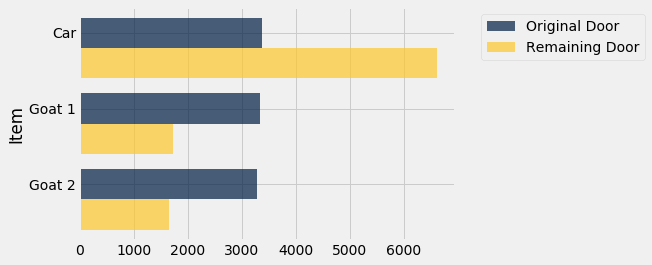

In [18]:
combined.barh(0)

Notice how the three blue bars are almost equal – the original choice is equally likely to be any of the three available items. But the gold bar corresponding to `Car` is twice as long as the blue. 

The simulation confirms that the contestant is twice as likely to win if she switches.